In [1]:
from google.colab import drive 
import random
import time
import collections
from nltk.corpus import stopwords
from nltk import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Import Libraries CNN
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding,Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints,optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout,BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
print('Training CNN 1D model.')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Training CNN 1D model.


In [2]:
def net_atapreprocessing_y(y):
    return tf.keras.utils.to_categorical(y, 1, dtype='float32')

In [3]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Data_Ds"
fnames = os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv(os.path.join(path, fnames[0]),encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.v1.value_counts()# Two categories of mail ham and spam.

ham     4825
spam     747
Name: v1, dtype: int64

In [7]:
file_content = df[['v1', 'v2']]

In [8]:
file_content.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Remove stop words
stop = stopwords.words('english')
file_content['v2'] = file_content['v2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
file_content.head()

,v1,v2
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"


In [11]:
Email_Data = file_content.copy()

In [12]:
Email_Data = Email_Data.rename(columns={"v1":"Target", "v2":"Email"})
Email_Data.head()

,Target,Email
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"


In [13]:
Email_Data['Email'] = Email_Data['Email'].apply(lambda x:re.sub('[!@#$:).;,?&]','', x.lower()))
Email_Data['Email'] = Email_Data['Email'].apply(lambda x:re.sub(' ', ' ', x))
# Email_Data['Email'].head(5)

In [14]:
#Separating text(input) and target classes
list_sentences_rawdata = Email_Data["Email"].fillna("_na_").values
list_classes = ["Target"]
target = Email_Data[list_classes].values
To_Process=Email_Data[['Email', 'Target']]

In [15]:
list_sentences_rawdata 

array(['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
       'ok lar joking wif u oni',
       "free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question(std txt ratetc's apply 08452810075over18's",
       ..., 'pity * mood that soany suggestions',
       "the guy bitching i acted like i'd interested buying something else next week gave us free",
       'rofl its true name'], dtype=object)

In [16]:
#Train and test split with 80:20 ratio
train, test = train_test_split(To_Process, test_size=0.2, random_state = 42)

In [17]:
# Define the sequence lengths, max number of words and
# embedding dimensions
# Sequence length of each sentence. If more, truncate. If less,
# pad with zeros
MAX_SEQUENCE_LENGTH = 300
# Top 20000 frequently occurring words
MAX_NB_WORDS = 20000

In [18]:
# Get the frequently occurring words
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train.Email)
train_sequences = tokenizer.texts_to_sequences(train.Email)
test_sequences = tokenizer.texts_to_sequences(test.Email)

In [19]:
# dictionary containing words and their index
word_index = tokenizer.word_index
print(tokenizer.word_index)
# total words in the corpus
print('Found %s unique tokens.' % len(word_index))
# get only the top frequent words on train

{'i': 1, 'u': 2, 'call': 3, 'you': 4, '2': 5, 'ur': 6, 'get': 7, "i'm": 8, '4': 9, 'ltgt': 10, 'go': 11, 'now': 12, 'free': 13, 'ok': 14, 'me': 15, 'know': 16, 'got': 17, 'it': 18, 'good': 19, 'come': 20, 'like': 21, 'no': 22, 'time': 23, 'love': 24, 'send': 25, 'day': 26, 'text': 27, 'want': 28, 'going': 29, 'txt': 30, 'one': 31, 'home': 32, 'need': 33, 'lor': 34, 'stop': 35, 'r': 36, 'still': 37, 'see': 38, "i'll": 39, 'sorry': 40, 'back': 41, 'how': 42, 'if': 43, 'do': 44, 'so': 45, 'reply': 46, 'mobile': 47, 'hi': 48, 'dont': 49, 'n': 50, 'today': 51, 'da': 52, 'but': 53, 'please': 54, 'tell': 55, 'new': 56, 'the': 57, 'just': 58, 'what': 59, 'my': 60, 'think': 61, 'ì': 62, 'later': 63, 'phone': 64, 'week': 65, 'we': 66, 'claim': 67, 'your': 68, 'hey': 69, 'well': 70, 'night': 71, 'msg': 72, 'take': 73, 'dear': 74, 'pls': 75, 'and': 76, 'way': 77, 'is': 78, 'happy': 79, 'in': 80, 'a': 81, 'oh': 82, 'to': 83, 'this': 84, 'much': 85, 'tomorrow': 86, 'can': 87, 'great': 88, 'make': 89

In [20]:
# get only the top frequent words on train
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [21]:
# get only the top frequent words on test
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [22]:
print(train_data.shape)
print(test_data.shape)

(4457, 300)
(1115, 300)


In [23]:
train_labels = train['Target']
test_labels = test['Target']

In [24]:

# converts the character array to numeric array. Assigns levels
# to unique labels.
le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)
print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['ham' 'spam']
(array([0, 1]), array([3860,  597]))
(array([0, 1]), array([965, 150]))


In [25]:
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (4457, 300)
Shape of label tensor: (4457, 2)
Shape of label tensor: (1115, 2)


In [26]:
EMBEDDING_DIM = 100
print(MAX_SEQUENCE_LENGTH)

300


In [27]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          2000000   
                                                                 
 dropout (Dropout)           (None, 300, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 296, 128)          64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 128)          0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 59, 128)           0         
                                                                 
 batch_normalization (BatchN  (None, 59, 128)          512       
 ormalization)                                          

In [28]:
model_history = model.fit(train_data, labels_train,batch_size=64,epochs=4,validation_data=(test_data, labels_test))

Epoch 1/4
70/70 [==============================] - 35s 457ms/step - loss: 0.2897 - acc: 0.8824 - val_loss: 0.8840 - val_acc: 0.8655
Epoch 2/4
70/70 [==============================] - 18s 251ms/step - loss: 0.0670 - acc: 0.9809 - val_loss: 1.3315 - val_acc: 0.8655
Epoch 3/4
70/70 [==============================] - 18s 252ms/step - loss: 0.0286 - acc: 0.9917 - val_loss: 1.9423 - val_acc: 0.8655
Epoch 4/4
70/70 [==============================] - 18s 251ms/step - loss: 0.0173 - acc: 0.9951 - val_loss: 1.9795 - val_acc: 0.8655


In [29]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


35/35 - 1s - loss: 1.9795 - acc: 0.8655 - 966ms/epoch - 28ms/step
Loss 1.9795042276382446
Accuracy 0.865470826625824
Accuracy on Test Data


<Figure size 432x288 with 0 Axes>

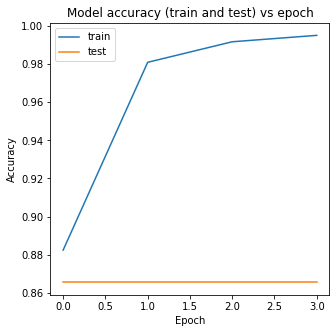

In [30]:
test = plt.figure()
plt.figure(figsize = (5,5))
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title("Model accuracy (train and test) vs epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc = 'upper left')
test.show()
print()
  # test_data, labels_test
test_loss, test_acc = model.evaluate(test_data,labels_test,verbose=2)
print('Loss',test_loss)
print('Accuracy', test_acc)
print('Accuracy on Test Data')
  # print(list_temp[i])

<Figure size 432x288 with 0 Axes>

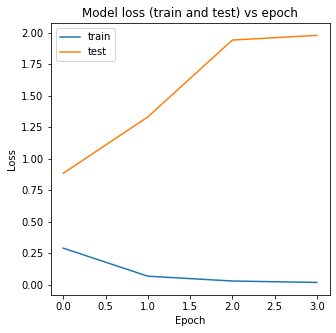

In [31]:
test = plt.figure()
plt.figure(figsize = (5,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss (train and test) vs epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','test'],loc = 'upper left')
test.show()

In [32]:
#predictions on test data
predicted=model.predict(test_data)
predicted

array([[1.0000000e+00, 5.4769789e-08],
       [1.0000000e+00, 8.4549734e-10],
       [1.0000000e+00, 2.2362146e-08],
       ...,
       [1.0000000e+00, 1.1791301e-09],
       [1.0000000e+00, 4.8105959e-09],
       [1.0000000e+00, 2.1653682e-08]], dtype=float32)

In [33]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score 
precision, recall, fscore, support =score(labels_test,predicted.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: [0.86547085 0.        ]
recall: [1. 0.]


In [34]:
pd.DataFrame([precision,recall,fscore],columns=['0','1'],index=['Precision','Recall','F1 Score'])

,0,1
Precision,0.865471,0.0
Recall,1.000000,0.0
F1 Score,0.927885,0.0


In [35]:
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test,predicted.round()))

fscore: [0.92788462 0.        ]
support: [965 150]
############################
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

   micro avg       0.87      0.87      0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115
 samples avg       0.87      0.87      0.87      1115

